In [1]:
import gdown
import zipfile
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, Sequential
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

ERROR! Session/line number was not unique in database. History logging moved to new session 29


In [2]:
url = "https://drive.google.com/file/d/1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE/view?usp=sharing"

file_id = url.split("/")[-2]
file_id

'1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE'

In [3]:
prefix = 'https://drive.google.com/uc?/export=download&id='
gdown.download(prefix + file_id, 'garbage.zip')

Downloading...
From (original): https://drive.google.com/uc?/export=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE
From (redirected): https://drive.google.com/uc?%2Fexport=download&id=1NRLlcbI4OqmL4SfDH2Ix86uRqy_0fWxE&confirm=t&uuid=64c12ec4-9f17-42b9-9363-538228e6e380
To: /kaggle/working/garbage.zip
100%|██████████| 133M/133M [00:03<00:00, 35.5MB/s] 


'garbage.zip'

In [4]:
zip_path = "/kaggle/working/garbage.zip"
extract_path = ""

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Extraction complete!")

Extraction complete!


In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

base_dir = "/kaggle/working/garbage"

def check_image_formats(base_dir, valid_exts):
    all_images_valid = True
    invalid_images = []

    for sub_dir in os.listdir(base_dir):
        sub_dir_path = os.path.join(base_dir, sub_dir)
        if not os.path.isdir(sub_dir_path):
            continue

        for file_name in os.listdir(sub_dir_path):
            file_path = os.path.join(sub_dir_path, file_name)

            if os.path.isdir(file_path):
                continue

            file_ext = file_name.split('.')[-1].lower()
            if file_ext not in valid_exts:
                all_images_valid = False
                invalid_images.append(file_path)

    if all_images_valid:
        print("All images are in the specified formats.")
    else:
        print("The following images are not in the specified formats:")
        for img in invalid_images:
            print(img)

check_image_formats(base_dir, image_exts)


All images are in the specified formats.


In [6]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))

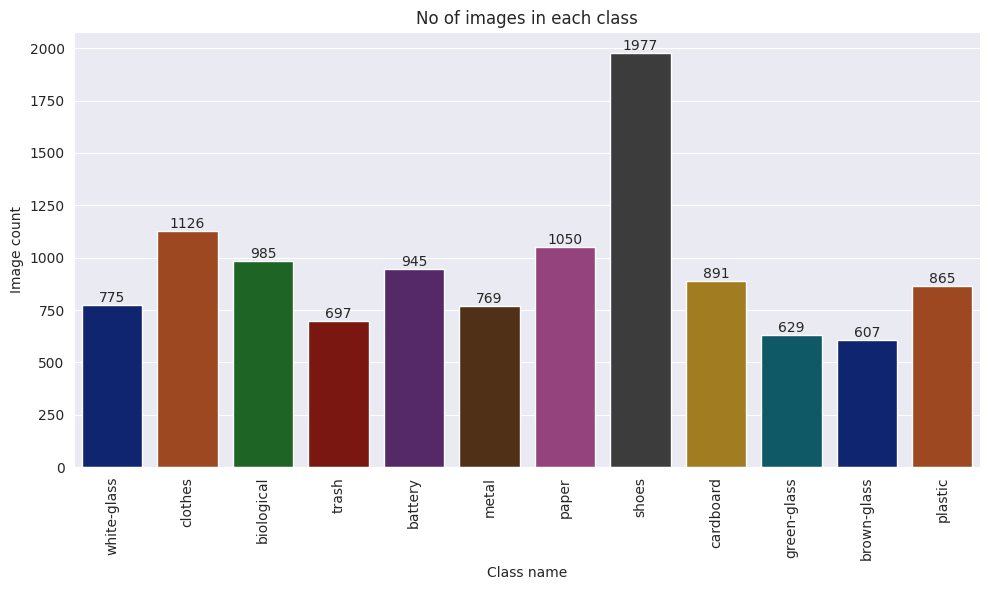

In [7]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [8]:
import random

base_path = "/kaggle/working/garbage"

for sub_dir in os.listdir(base_path):
    sub_dir_path = os.path.join(base_path, sub_dir)
    images = os.listdir(sub_dir_path)
    total_images = len(images)

    if total_images > 700:
        images_to_delete = total_images - 700

        for _ in range(images_to_delete):
            random_img = random.choice(images)
            delete_img = os.path.join(sub_dir_path, random_img)

            os.remove(delete_img)
            images.remove(random_img)

        print(f"Deleted {images_to_delete} images in {sub_dir}")
    else:
        print(f"No deletion needed in {sub_dir}")


Deleted 75 images in white-glass
Deleted 426 images in clothes
Deleted 285 images in biological
No deletion needed in trash
Deleted 245 images in battery
Deleted 69 images in metal
Deleted 350 images in paper
Deleted 1277 images in shoes
Deleted 191 images in cardboard
No deletion needed in green-glass
No deletion needed in brown-glass
Deleted 165 images in plastic


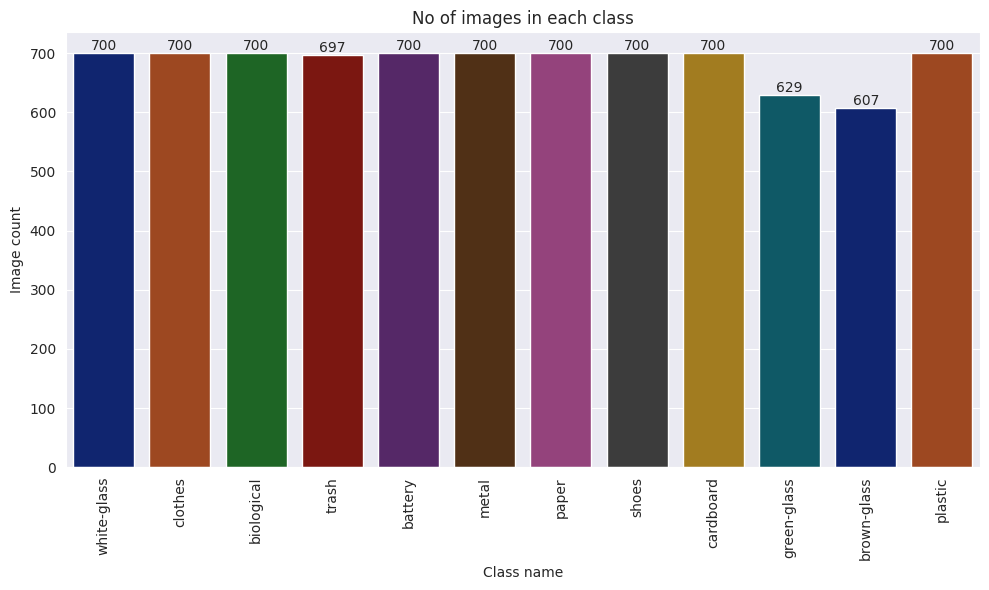

In [9]:
data_dir = "/kaggle/working/garbage"
name = []
length = []

for i in os.listdir(data_dir):
  file_path = os.path.join(data_dir,i)
  name.append(i)
  length.append(len(os.listdir(file_path)))



plt.figure(figsize=(10,6))
ax = sns.barplot(x=name,y=length,palette='dark')
for i in ax.containers:
  ax.bar_label(i)
plt.title("No of images in each class")
plt.xlabel("Class name")
plt.ylabel("Image count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [10]:
import random
import pandas as pd

garbage_classes = {
    "battery":       {"CH4": (1, 3), "CO2": (550, 650), "CO": (1, 3), "H2S": (0.02, 0.05), "VOCs": (2, 6), "NH3": (0.001, 0.003), "Odor": (3, 5)},
    "biological":    {"CH4": (200, 350), "CO2": (1200, 1600), "CO": (15, 30), "H2S": (0.4, 0.7), "VOCs": (12, 20), "NH3": (0.2, 0.35), "Odor": (8, 9)},
    "brown-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "cardboard":     {"CH4": (2, 4), "CO2": (500, 600), "CO": (2, 4), "H2S": (0.002, 0.006), "VOCs": (0.5, 1), "NH3": (0.001, 0.003), "Odor": (2, 3)},
    "clothes":       {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "green-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "metal":         {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
    "paper":         {"CH4": (1, 3), "CO2": (500, 600), "CO": (1, 3), "H2S": (0.001, 0.004), "VOCs": (0.3, 0.7), "NH3": (0, 0.002), "Odor": (1, 2)},
    "plastic":       {"CH4": (3, 6), "CO2": (600, 800), "CO": (4, 7), "H2S": (0.002, 0.006), "VOCs": (6, 12), "NH3": (0.001, 0.003), "Odor": (3, 4)},
    "shoes":         {"CH4": (5, 8), "CO2": (600, 750), "CO": (5, 8), "H2S": (0.01, 0.03), "VOCs": (3, 7), "NH3": (0.005, 0.01), "Odor": (4, 5)},
    "trash":         {"CH4": (10, 20), "CO2": (700, 900), "CO": (8, 12), "H2S": (0.05, 0.1), "VOCs": (4, 8), "NH3": (0.01, 0.02), "Odor": (5, 6)},
    "white-glass":   {"CH4": (0, 0), "CO2": (450, 550), "CO": (0, 0), "H2S": (0, 0), "VOCs": (0, 0), "NH3": (0, 0), "Odor": (0, 0)},
}

dataset_path = "/kaggle/working/garbage"

data = []

for category, ranges in garbage_classes.items():
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):
        for img_file in os.listdir(category_path):
            if img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
                img_path = os.path.join(category_path, img_file)

                sensor_values = {gas: round(random.uniform(*range_val), 3) for gas, range_val in ranges.items()}

                data.append({"image_path": img_path, "label": category, **sensor_values})

df = pd.DataFrame(data)

df.to_csv("garbage_sensor_data.csv", index=False)


In [11]:
path = "/kaggle/working/garbage_sensor_data.csv"
data = pd.read_csv(path)

data = pd.DataFrame(data)
data

,image_path,label,CH4,CO2,CO,H2S,VOCs,NH3,Odor
0,/kaggle/working/garbage/battery/battery385.jpg,battery,1.750,568.140,2.409,0.035,5.978,0.002,4.237
1,/kaggle/working/garbage/battery/battery868.jpg,battery,1.234,602.540,1.598,0.023,5.721,0.002,4.098
2,/kaggle/working/garbage/battery/battery446.jpg,battery,1.933,629.981,1.893,0.034,4.648,0.002,4.629
3,/kaggle/working/garbage/battery/battery268.jpg,battery,1.891,560.589,1.135,0.026,4.404,0.002,3.407
4,/kaggle/working/garbage/battery/battery611.jpg,battery,1.655,588.411,2.846,0.048,2.872,0.002,4.193
...,...,...,...,...,...,...,...,...,...
8228,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,489.997,0.000,0.000,0.000,0.000,0.000
8229,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,455.074,0.000,0.000,0.000,0.000,0.000
8230,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,474.707,0.000,0.000,0.000,0.000,0.000
8231,/kaggle/working/garbage/white-glass/white-glas...,white-glass,0.000,491.208,0.000,0.000,0.000,0.000,0.000


In [12]:
from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']] = scaling.fit_transform(data[['CH4','CO2','CO','H2S','VOCs','NH3','Odor']])

In [13]:
train_df = data.sample(frac=1,random_state=0).iloc[:6000]
val_df = data.sample(frac=1,random_state=0).iloc[6000:7500]
test_df = data.sample(frac=1,random_state=0).iloc[7500:]

print("training data: ", train_df.shape)
print("validation data: ", val_df.shape)
print("testing data: ", test_df.shape)

training data:  (6000, 9)
validation data:  (1500, 9)
testing data:  (733, 9)


In [14]:
import numpy as np
import cv2
import pandas as pd
import keras
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications import InceptionResNetV2, EfficientNetB7
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Concatenate, BatchNormalization
from tensorflow.keras.models import Model


class MultiModalDataGenerator(Sequence):
    def __init__(self, df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=None):
        self.df = df
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.augmentor = augmentor
        self.indices = np.arange(len(df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def __getitem__(self, index):
        batch_indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[batch_indices]
        return self.__data_generation(batch_df)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __data_generation(self, batch_df):
        batch_size = len(batch_df)
        image_batch = np.zeros((batch_size, *self.img_size, 3), dtype=np.float32)
        gas_batch = np.zeros((batch_size, 7), dtype=np.float32)

        label_mapping = {
            "battery": 0,
            "biological": 1,
            "brown-glass": 2,
            "cardboard": 3,
            "clothes": 4,
            "green-glass": 5,
            "metal": 6,
            "paper": 7,
            "plastic": 8,
            "shoes": 9,
            "trash": 10,
            "white-glass": 11
        }
        num_classes = len(label_mapping)
        labels = np.zeros((batch_size, num_classes), dtype=np.float32)

        for i, row in enumerate(batch_df.itertuples()):
            img = cv2.imread(row.image_path)
            if img is None:
                print("Error reading image:", row.image_path)
                continue
            img = cv2.resize(img, self.img_size)
            img = img.astype(np.float32) / 255.0
            if self.augmentor is not None:
                img = self.augmentor.random_transform(img)
            image_batch[i] = img

            gas_values = [row.CH4, row.CO2, row.CO, row.H2S, row.VOCs, row.NH3, row.Odor]
            gas_batch[i] = np.array(gas_values, dtype=np.float32)

            label_idx = label_mapping.get(row.label)
            if label_idx is not None:
                labels[i, label_idx] = 1

        return ((image_batch, gas_batch), labels)


augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = MultiModalDataGenerator(train_df, batch_size=32, img_size=(224,224), shuffle=True, augmentor=augmentor)
val_generator   = MultiModalDataGenerator(val_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)
test_generator  = MultiModalDataGenerator(test_df, batch_size=32, img_size=(224,224), shuffle=False, augmentor=None)



image_input = Input(shape=(224,224,3), name='image_input')
# Xception
xception = Xception(include_top=False, input_tensor=image_input)
xception.trainable = False
x = xception.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

gas_input = Input(shape=(7,), name='gas_input')
y = Dense(32, activation='relu')(gas_input)
y = BatchNormalization()(y)
y = Dense(64, activation='relu')(y)
y = BatchNormalization()(y)

combined = Concatenate()([x, y])
z = Dense(128, activation='relu')(combined)
z = Dropout(0.5)(z)
output = Dense(12, activation='softmax', name='output')(z)

model = Model(inputs=[image_input, gas_input], outputs=output)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ image_input (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ image_input[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization  

 Total params: 72,320,372 (275.88 MB)

 Trainable params: 51,458,700 (196.30 MB)

 Non-trainable params: 20,861,672 (79.58 MB)

In [15]:
history = model.fit(
    train_generator,
    epochs=100,
    validation_data=val_generator
)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 79s 341ms/step - accuracy: 0.3755 - loss: 2.1413 - val_accuracy: 0.8261 - val_loss: 0.6813
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 328ms/step - accuracy: 0.7180 - loss: 0.8565 - val_accuracy: 0.8947 - val_loss: 0.4061
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.7990 - loss: 0.6149 - val_accuracy: 0.9253 - val_loss: 0.2503
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 332ms/step - accuracy: 0.8343 - loss: 0.5183 - val_accuracy: 0.9334 - val_loss: 0.2051
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.8592 - loss: 0.4333 - val_accuracy: 0.9389 - val_loss: 0.1895
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.8631 - loss: 0.4123 - val_accuracy: 0.9402 - val_loss: 0.1767
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 63s 327ms/step - accuracy: 0.8803 - loss: 0.3700 - val_accuracy: 0.9443 - val_loss: 0.1572
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 64s 330ms/step - accuracy: 0.8934 -

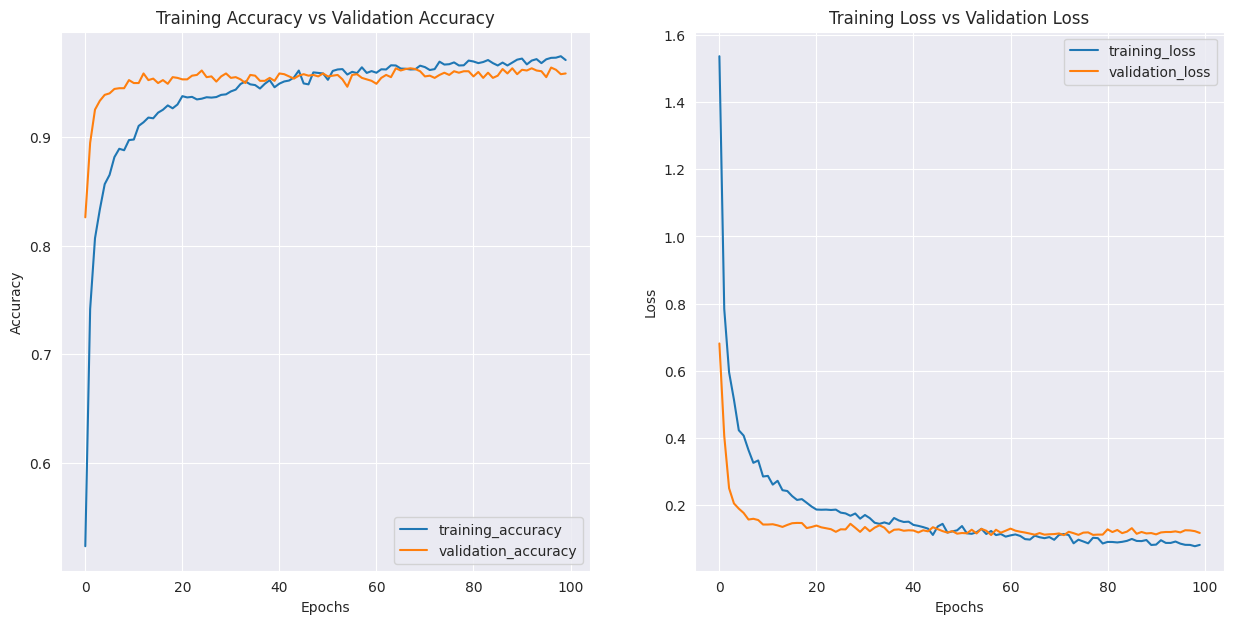

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].plot(history.history['accuracy'],label='training_accuracy')
ax[0].plot(history.history['val_accuracy'],label='validation_accuracy')
ax[0].set_title("Training Accuracy vs Validation Accuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[0].legend()

ax[1].plot(history.history['loss'],label='training_loss')
ax[1].plot(history.history['val_loss'],label='validation_loss')
ax[1].set_title("Training Loss vs Validation Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].legend()

plt.show()

In [17]:
model.save("Garbage_Segregation_Xception_Model.h5")
print("Model Saved !!!")

Model Saved !!!


In [18]:
model.save_weights("Garbage_Segregation_Xception_Weights.weights.h5")
print("Weights saved !!!")

Weights saved !!!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


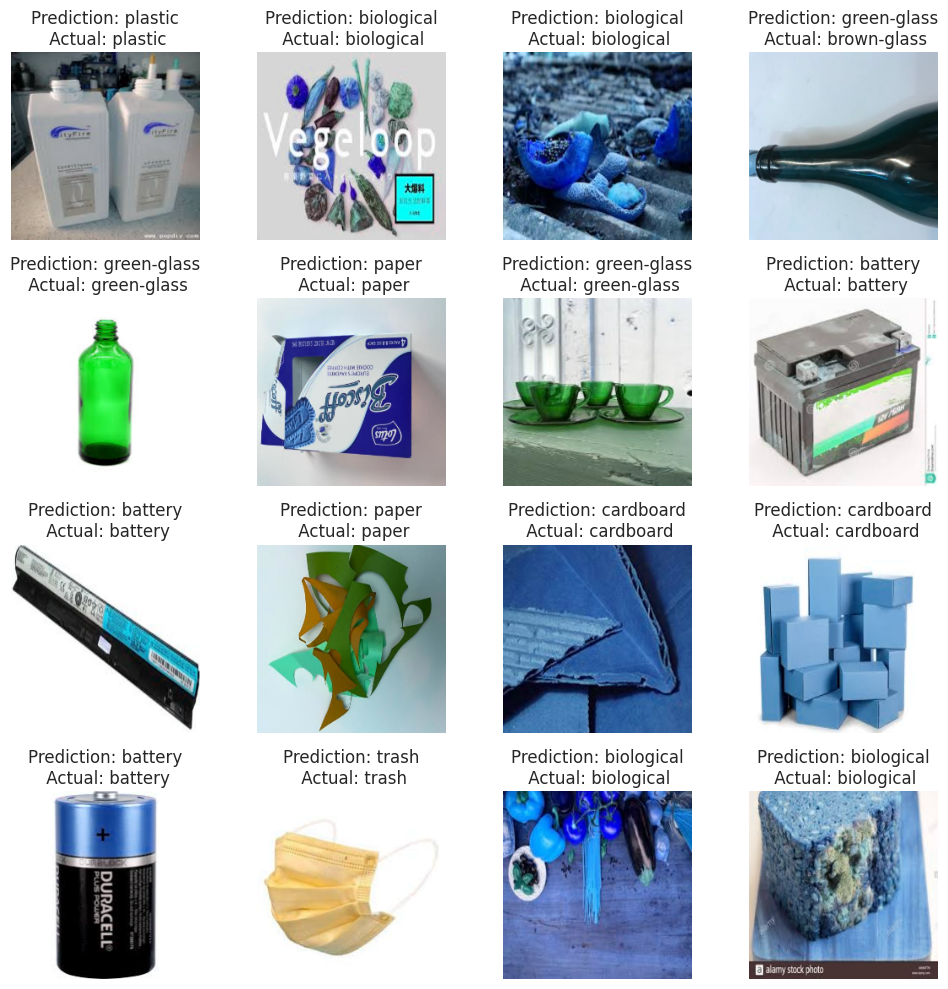

In [19]:
from tensorflow.keras.models import load_model

(image_batch, gas_batch), labels = test_generator[0]

Xception = load_model("/kaggle/working/Garbage_Segregation_Xception_Model.h5")

pred_probs = Xception.predict((image_batch, gas_batch))
predicted_class = np.argmax(pred_probs, axis=1)

true_class = np.argmax(labels, axis=1)

class_names = ["battery", "biological", "brown-glass", "cardboard", "clothes",
               "green-glass", "metal", "paper", "plastic", "shoes", "trash", "white-glass"]

fig, axes = plt.subplots(4,4, figsize=(10, 10))
axes = axes.flatten()

for i in range(16):
    img = (image_batch[i] * 255).astype('uint8')
    axes[i].imshow(img)

    pred_label = class_names[predicted_class[i]]
    true_label = class_names[true_class[i]]

    axes[i].set_title(f"Prediction: {pred_label}\n Actual: {true_label}")
    axes[i].axis("off")


plt.tight_layout()
plt.show()


In [86]:
model.save("Garbage_Segregation_Xception_Model.h5")
print("Model Saved !!!")

Model Saved !!!
